In [3]:
## install the following require package via conda
# conda install r-RCurl
# conda install -c r r-evd
# conda install -c r r-Cairo
# conda config --append channels conda-forge
# conda install -c r r-extRemes
# conda install liblapack

In [4]:
library("extRemes")
library("evd")
library("Cairo")

In [5]:
args = commandArgs(trailingOnly=TRUE)
args[1] <- "Dataset/Snapbuddy_timing.txt"
args[2] <- "15.6"

namefile <- strsplit(args[1],"./")[[1]][2]
print(namefile)

[1] "Snapbuddy_timing.txt"


In [6]:
if(namefile == "gabfeed_time.csv") {
   a <- read.csv(namefile, sep = ",")
   a <- as.matrix(a)
   aa <- as.vector(a)
   aa <- aa/1000000
} else {
   a <- read.csv(paste("./",args[1],sep = ''), sep = "\n", header=F)
   aa <- a$V1
   aa <- sample(aa,length(aa))
}

if(namefile == "Snapbuddy_timing.txt")
{
   aa <- a$V1/1000
} else if(namefile == "LogisticRegression_timing.txt") {
   aa <- a$V1/1000000
   aa <- unique(aa)   
} else if(namefile == "TreeRegressor_timing.txt") {
   # only consider execution times up to 100 seconds
   aa <- a$V1/1000000
   aa1 <- Filter(function(x){if(x >= 25) return(TRUE) else return(FALSE)}, aa)
   aa2 <- Filter(function(x){if(x < 25) return(TRUE) else return(FALSE)}, aa)
   aa1 <- unique(aa1)
   aa <- c(aa1,aa2)
   aa <- sample(aa,length(aa))
   aa <- aa[aa < 100]
}

Warning message in plot.window(...):
“"nint" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"nint" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"nint" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"nint" is not a graphical parameter”Warning message in box(...):
“"nint" is not a graphical parameter”Warning message in title(...):
“"nint" is not a graphical parameter”

[1] "these are threshold for 95% and 99.7%"
     95%    99.7% 
14.72905 16.35170 


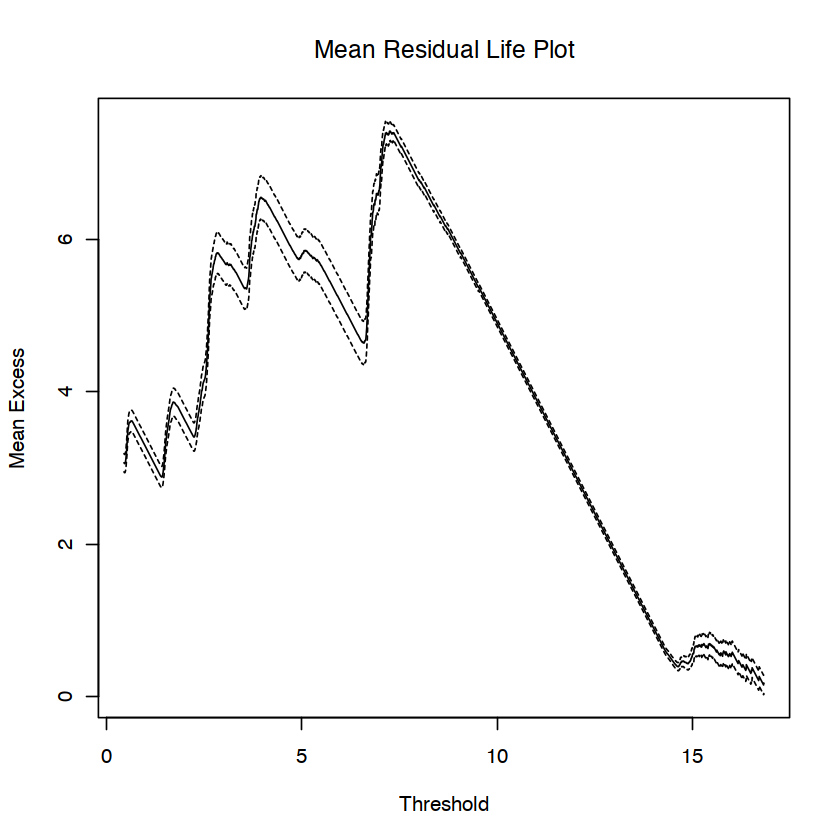

In [7]:
mrlplot(aa, nint = 10)

t_approx <- quantile(aa, c(.95, .997))
print("these are threshold for 95% and 99.7%")
print(t_approx)

t <- as.numeric(args[2])

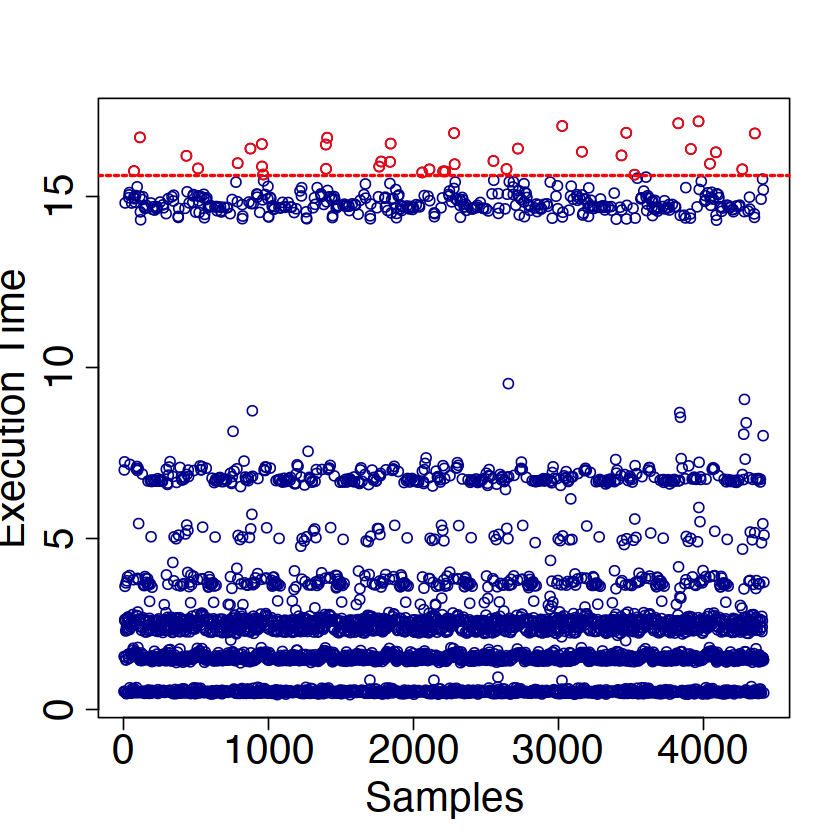

In [8]:
plot(aa, type = "p", col = "darkblue", lwd = 1, cex.lab = 2, cex.axis = 2, font = 2, xlab = "Samples", ylab = "Execution Time")
abline(h = t, col = "red", lty=c(2), lwd=c(2))
points(which(aa > t, arr.ind = TRUE), aa[aa > t], col="red")

In [9]:
if(namefile == "TreeRegressor_timing.txt") {
   fit1 <- fevd(aa, type = "PP", method = "Bayesian", threshold = t, time.units = "days", units = "Time", period.basis = "1 unit = 365 sample")
} else {
   fit1 <- fevd(aa, type = "PP", threshold = t, time.units = "days", units = "Time", period.basis = "1 unit = 365 sample")
}
distill(fit1)

location             scale             shape              nllh 
     16.421336354       0.515886061      -0.599857233      10.769658860 
location.location    scale.location    shape.location    location.scale 
      0.020673950      -0.002324867      -0.020227029      -0.002324867 
      scale.scale       shape.scale    location.shape       scale.shape 
      0.003466274      -0.001160337      -0.020227029      -0.001160337 
      shape.shape 
      0.036049637

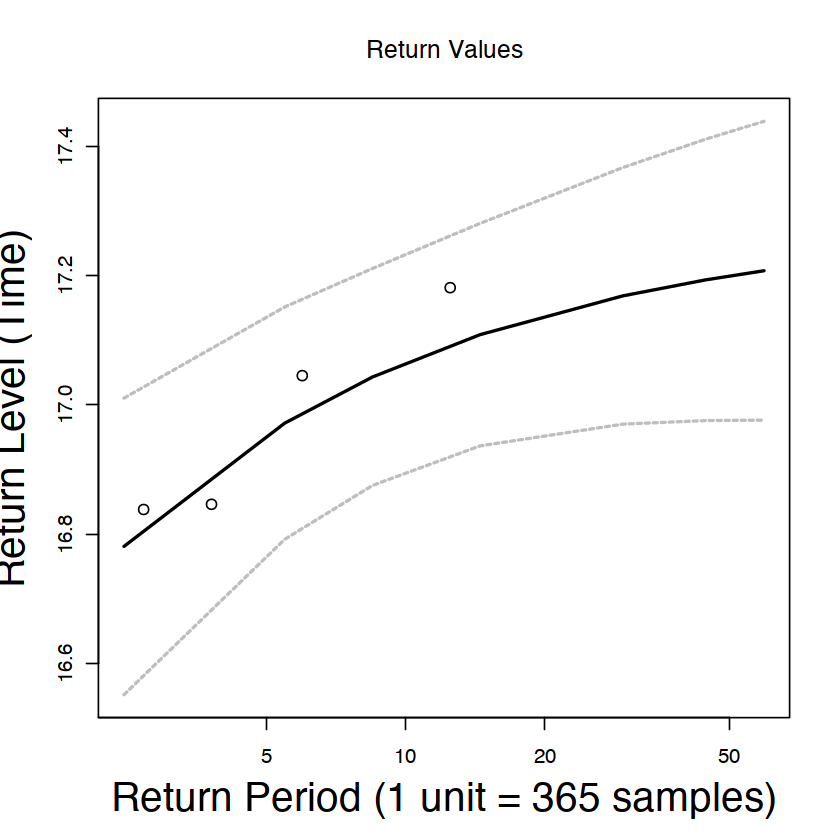

In [10]:
plot(fit1, "rl", rperiods = c(3, 6, 9, 15, 30, 45, 60), 
     main = "Return Values", lwd = 2, cex.axis = 1, cex.lab = 2, font = 2)

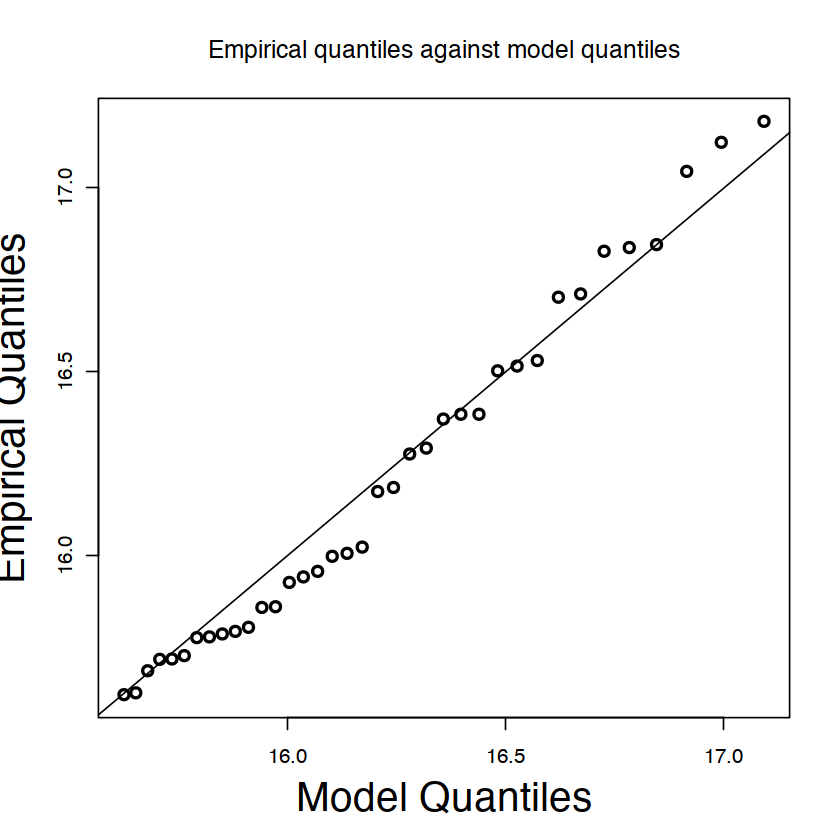

In [11]:
plot(fit1, "qq",main = "Empirical quantiles against model quantiles", lwd = 2, cex.axis = 1, cex.lab = 2, font = 2)

Warning message in get(paste0("plot.", newcl))(x = x, type = type, rperiods = rperiods, :
“plot.fevd.mle: span or npy not integers; determination of max in each block may be substantially in error when there are many blocks.”

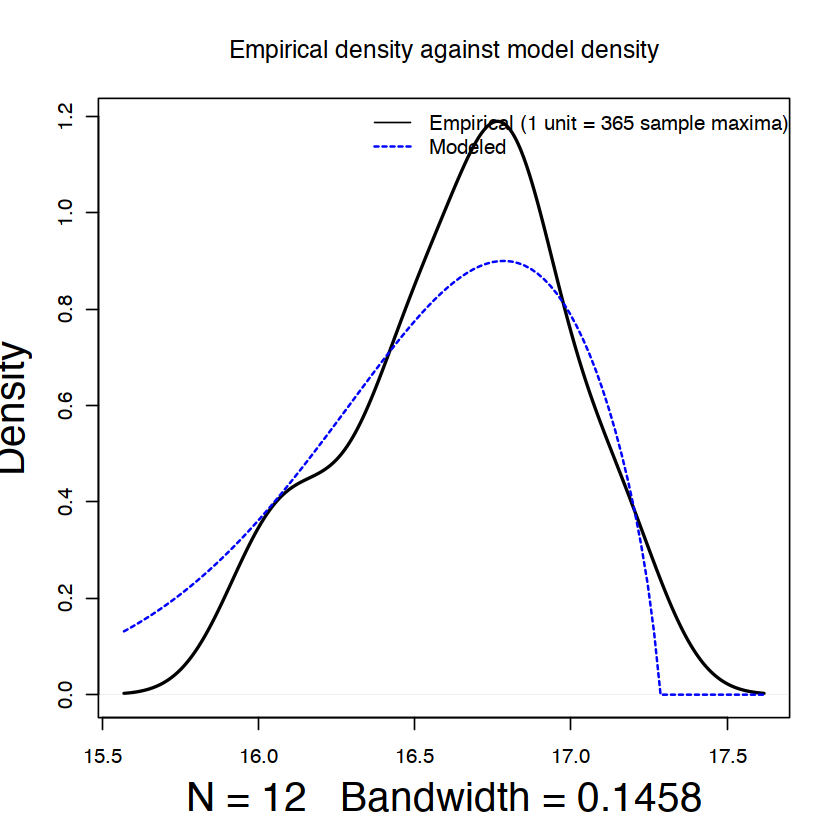

In [12]:
plot(fit1, "density" , main = "Empirical density against model density", lwd = 2, cex.axis = 1, cex.lab = 2, font = 2)

In [13]:
summary(fit1)

return.level(fit1)
return.level(fit1, do.ci=FALSE)
returns <- ci(fit1, return.period=c(2.73972602739726, 2*2.73972602739726, 5* 2.73972602739726, 10 * 2.73972602739726, 20 * 2.73972602739726, 50*2.73972602739726))
print(returns)

P = ecdf(fit1$x)
apply(returns, 2, function(x) P(x))


fevd(x = aa, threshold = t, type = "PP", units = "Time", time.units = "days", 
    period.basis = "1 unit = 365 sample")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  10.76966 


 Estimated parameters:
  location      scale      shape 
16.4213364  0.5158861 -0.5998572 

 Standard Error Estimates:
  location      scale      shape 
0.14378439 0.05887507 0.18986742 

 Estimated parameter covariance matrix.
             location        scale        shape
location  0.020673950 -0.002324867 -0.020227029
scale    -0.002324867  0.003466274 -0.001160337
shape    -0.020227029 -0.001160337  0.036049637

 AIC = 27.53932 

 BIC = 32.37207 


fevd(x = aa, threshold = t, type = "PP", units = "Time", time.units = "days", 
    period.basis = "1 unit = 365 sample")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period)
[1] "PP model fitted to aa (Time)"
[1] "Return levels based on GEV equivalency (i.e., return levels are for block maxima, where the blocks are 1 unit = 365 samples)"
Data are assumed to be  stationary 
[1] "Return Levels for period units in 1 unit = 365 samples"
  2-1 unit = 365 sample level  20-1 unit = 365 sample level 
                     16.59107                      17.13657 
100-1 unit = 365 sample level 
                     17.22689 

fevd(x = aa, threshold = t, type = "PP", units = "Time", time.units = "days", 
    period.basis = "1 unit = 365 sample")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period, 
    do.ci = FALSE)
[1] "PP model fitted to aa (Time)"
[1] "Return levels based on GEV equivalency (i.e., return levels are for block maxima, where the blocks are 1 unit = 365 samples)"
Data are assumed to be  stationary 
[1] "Return Levels for period units in 1 unit = 365 samples"
  2-1 unit = 365 sample level  20-1 unit = 365 sample level 
                     16.59107                      17.13657 
100-1 unit = 365 sample level 
                     17.22689 

fevd(x = aa, threshold = t, type = "PP", units = "Time", time.units = "days", 
    period.basis = "1 unit = 365 sample")

[1] "Normal Approx."

                                                  95% lower CI Estimate
2.73972602739726-1 unit = 365 sample return level     16.50827 16.74572
5.47945205479452-1 unit = 365 sample return level     16.76810 16.95237
13.6986301369863-1 unit = 365 sample return level     16.92836 17.09834
27.3972602739726-1 unit = 365 sample return level     16.96767 17.16198
54.7945205479452-1 unit = 365 sample return level     16.97618 17.20302
136.986301369863-1 unit = 365 sample return level     16.97028 17.23629
                                                  95% upper CI
2.73972602739726-1 unit = 365 sample return level     16.98318
5.47945205479452-1 unit = 365 sample return level     17.13663
13.6986301369863-1 unit = 365 sample return level     17.26832
27.3972602739726-1 unit = 365 sample return level     17.35628
54.7945205479452-1 unit = 365 sample 

95% lower CI,Estimate,95% upper CI
0.9977376,0.9986425,0.9993213
0.9986425,0.9993213,0.9997738
0.9993213,0.9995475,1.0000000
0.9993213,0.9997738,1.0000000
0.9993213,1.0000000,1.0000000
0.9993213,1.0000000,1.0000000
